<a href="https://colab.research.google.com/github/almasurinarshad/TripAdvisorReview-Sentiment-Analysis/blob/main/TripAdvisor_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install Packages & Calling Packages

In [ ]:
install.packages("dplyr")
install.packages("readr")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("tidytext")
install.packages("tidyverse")
install.packages("stringr")
install.packages("tidyr")
install.packages("scales")
install.packages("broom")
install.packages("purrr")
install.packages("widyr")
install.packages("igraph")
install.packages("ggraph")
install.packages("SnowballC")
install.packages("wordcloud")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspe

In [ ]:
library(dplyr)
library(readr)
library(lubridate)
library(ggplot2)
library(tidytext)
library(tidyverse)
library(stringr)
library(tidyr)
library(scales)
library(broom)
library(purrr)
library(widyr)
library(igraph)
library(ggraph)
library(SnowballC)
library(wordcloud)
library(reshape2)
theme_set(theme_minimal())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.7     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union() 

In [ ]:
df<-read.csv("AllRestourant_Cleaned.csv", sep=";", header=TRUE)
df
dim(df); min(df$Review.Date); max(df$Review.Date)

X,Review.Date,Review.Rating,Review.Title,Review.Body,Restourant.Name
<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,2018-06-09,50,A must try,"The staffs are very welcoming and friendly and has a passion doing their job. Very unique experienced. The dining area is totally dark, the menu are yummy and it is reasonable price. It will really fill your hungry tummy. Menu is consists of four appetisers,...More",DiningInTheDarkKL
2,2018-06-08,50,amazing even for a claustrophobic!,"before entering l was a bit worried cause l have claustrophobia. The waiters kept assured me l can tell them if at any point l feel uncomfortable. surprisingly l was ok throughout, and the waiter came joyfully (from his voice) explaining every dish they served....More",DiningInTheDarkKL
3,2018-06-06,50,"Clever, different, great experience","This was nothing like we've done before. Really interesting to eat without being able to see the food. Completely changes the experience. The staff were super friendly, especially Yus our waiter. Would recommend that everyone tries this!",DiningInTheDarkKL
4,2018-06-05,50,Amazing dinner experience,A very different dinner experience. When I came out of the dining room I had started having a different perspective about life and started having so much respect for the visually impaired people. They are super talented and gentle. Food and service was outstanding.,DiningInTheDarkKL
5,2018-05-30,50,Best time of our trip.,"We were on trip in Malaysia, been to Penang Malacca and last stop in KL. In KL we had a good time in batucaves. The last day last stop is the dining in the dark, glad we did it. Had a wonderful time and really...More",DiningInTheDarkKL
6,2018-05-28,30,Interesting Dining Place that use your other senses,Give you surprise once you walk into the restaurant. You are blindfolded. You use other senses to tell you what are the food and ppl around you.,DiningInTheDarkKL
7,2018-05-27,50,The best experience.,"Totally different than I thought, it was quite impressive and they have exceeded my expectations. A bit challenging when trying to figure out what we were eating, but it was fun doing it. They change menu next month and will come again.",DiningInTheDarkKL
8,2018-05-21,50,A Dark Dining Experience,Dining in The Dark gave us one of the best dining experience in Malaysia. Its unique theme and dark ambiance brought a marvelous experience that we never imagine. A setting that will heighten your tasting senses. No need to say more. This place is highly...More,DiningInTheDarkKL
9,2018-05-20,30,"If you want some adventure, you have to try this",I am not an adventurous type of person when it comes to dining. But this is something that those who look for an adventure must try in KL. The servers are visually challenged and you get to experience how they feel when they eat. It’s...More,DiningInTheDarkKL


[1] 1000    6

[1] "2016-10-25"

[1] "2021-04-06"

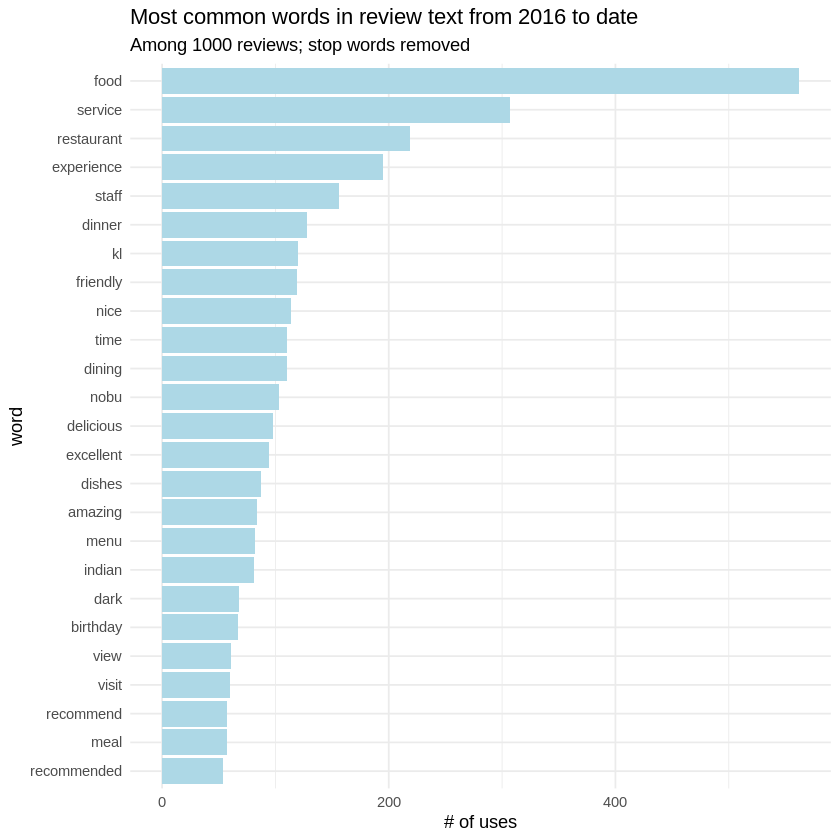

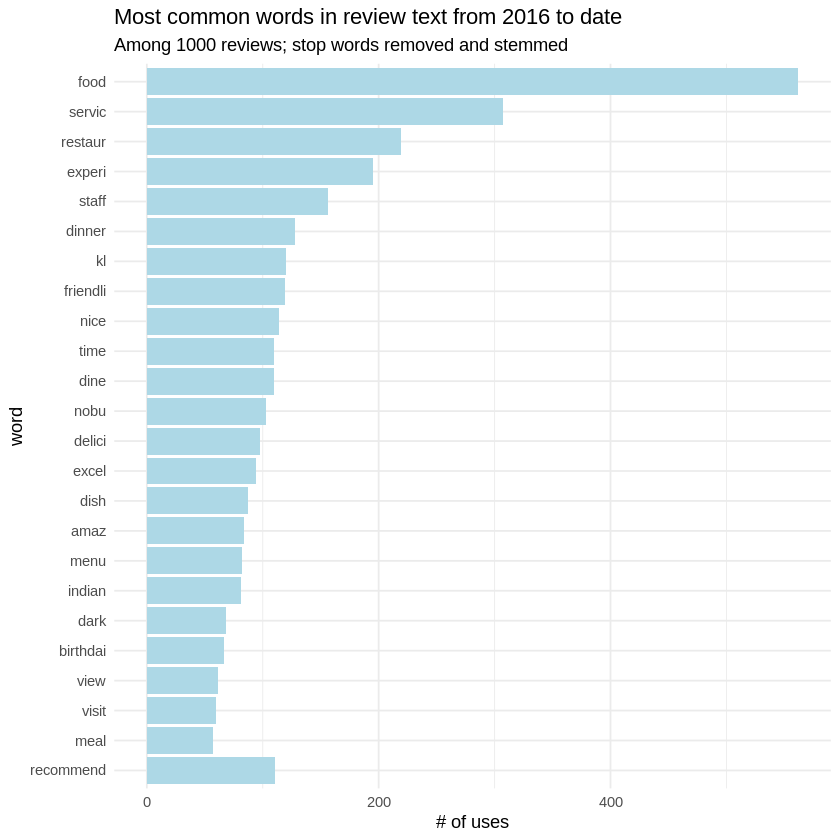

In [ ]:
#Most common words in review text from 2016 to date
df <- tibble::rowid_to_column(df, "ID")
df <- df %>%
  mutate(Review.Date = as.POSIXct(Review.Date, origin = "2016-01-01"),month = round_date(Review.Date, "month"))
review_words <- df %>%
  distinct(Review.Body, .keep_all = TRUE) %>%
  unnest_tokens(word, Review.Body, drop = FALSE) %>%
  distinct(ID, word, .keep_all = TRUE) %>%
  anti_join(stop_words, by = "word") %>%
  filter(str_detect(word, "[^\\d]")) %>%
  group_by(word) %>%
  mutate(word_total = n()) %>%
  ungroup()
word_counts <- review_words %>%
  count(word, sort = TRUE)
word_counts %>%
  head(25) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col(fill = "lightblue") +
  scale_y_continuous(labels = comma_format()) +
  coord_flip() +
  labs(title = "Most common words in review text from 2016 to date",
       subtitle = "Among 1000 reviews; stop words removed",
       y = "# of uses")


word_counts %>%
  head(25) %>%
  mutate(word = wordStem(word)) %>% 
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col(fill = "lightblue") +
  scale_y_continuous(labels = comma_format()) +
  coord_flip() +
  labs(title = "Most common words in review text from 2016 to date",
       subtitle = "Among 1000 reviews; stop words removed and stemmed",
       y = "# of uses")

bigram,n
<chr>,<int>
kuala lumpur,34
betel leaf,32
dining experience,32
indian food,30
malaysian food,27
friendly staff,25
fine dining,24
suckling pig,23
el cerdo,20


Joining, by = "word"
Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
ℹ Please use `tibble()` instead.”
Joining, by = "word"
Warning message:
“ggrepel: 3227 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


List of 92
 $ line                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ rect                      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ title                     : NULL
 $ aspect.ratio              : NULL
 $ axis.title                : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.title.x              : NULL
 $ axis.title.x.top          : NULL
 $ axis.title.x.bottom       : NULL
 $ axis.titl

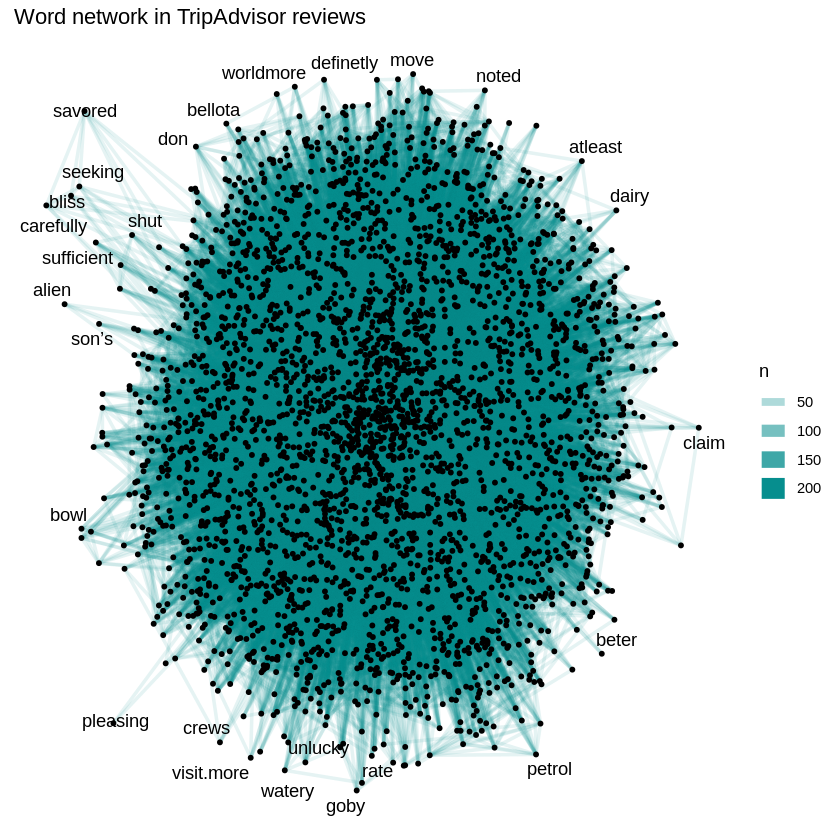

In [ ]:
#Word network in TripAdvisor reviews

review_bigrams <- df %>%
  unnest_tokens(bigram, Review.Body, token = "ngrams", n = 2)
bigrams_separated <- review_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
bigrams_united %>%
  count(bigram, sort = TRUE)

review_subject <- df %>% 
  unnest_tokens(word, Review.Body) %>% 
  anti_join(stop_words)
my_stopwords <- data_frame(word = c(as.character(1:10)))
review_subject <- review_subject %>% 
  anti_join(my_stopwords)
title_word_pairs <- review_subject %>% 
  pairwise_count(word, ID, sort = TRUE, upper = FALSE)
set.seed(1234)
title_word_pairs %>%
  filter(n <= 1000) %>%
  graph_from_data_frame() %>%
  ggraph(layout = "fr") +
  geom_edge_link(aes(edge_alpha = n, edge_width = n), edge_colour = "cyan4") +
  geom_node_point(size = 1) +
  geom_node_text(aes(label = name), repel = TRUE, 
                 point.padding = unit(0.2, "lines")) +
  ggtitle('Word network in TripAdvisor reviews')
theme_void()


Joining, by = "word"
Joining, by = "word"
Selecting by n


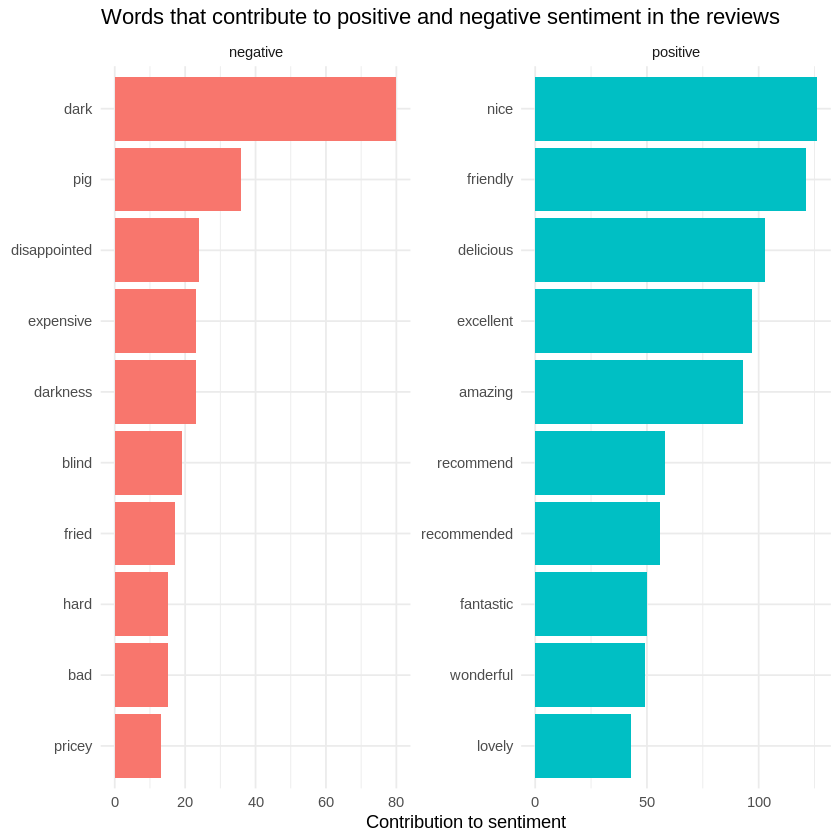

In [ ]:
#Words that contribute to positive and negative sentiment in the reviews
reviews <- df %>% 
  filter(!is.na(Review.Body)) %>% 
  select(ID, Review.Body) %>% 
  group_by(row_number()) %>% 
  ungroup()
tidy_reviews <- reviews %>%
  unnest_tokens(word, Review.Body)
tidy_reviews <- tidy_reviews %>%
  anti_join(stop_words)

bing_word_counts <- tidy_reviews %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free") +
  labs(y = "Contribution to sentiment", x = NULL) +
  coord_flip() + 
  ggtitle('Words that contribute to positive and negative sentiment in the reviews')

